In [72]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from  scipy import stats


In [163]:
pd.set_option('display.max_rows', None)  # or use a specific number like 1000
pd.set_option('display.max_columns', None)

In [9]:
os.chdir('C:/Users/Abreham/Documents/AIM2/datasets')

In [10]:
text_file = 'MachineLearningRating_v3.txt'

In [73]:
text_file

'MachineLearningRating_v3.txt'

In [74]:
df = pd.read_csv(text_file, sep='|')
# df.to_csv('insurance_data.csv', index=False)

C:\Users\Abreham\AppData\Local\Temp\ipykernel_6832\1684518443.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file, sep='|')


In [75]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [76]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [77]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [110]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [78]:
df['VehicleType'] = df['VehicleType'].fillna(df['VehicleType'].mode()[0])

In [79]:
df['mmcode'] = df['mmcode'].fillna(df['mmcode'].mean())

In [80]:
df['MaritalStatus'] =df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [81]:
accountType_mode =df['AccountType'].mode()[0]
df['AccountType'] = df['AccountType'].fillna(accountType_mode)

In [82]:
bank_mode = df['Bank'].mode()[0]

In [50]:
df['Bank'] = df['Bank'].fillna(bank_mode)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [84]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [88]:
df['Gender']

0          Not specified
1          Not specified
2          Not specified
3          Not specified
4          Not specified
               ...      
1000093             Male
1000094             Male
1000095             Male
1000096             Male
1000097             Male
Name: Gender, Length: 1000098, dtype: object

In [87]:
male_female = df[df['Gender'].isin(['Male','Female'])]
mode_gender = male_female['Gender'].mode()[0]


In [90]:
df['Gender'] = df['Gender'].replace('Not specified', mode_gender)
df['Gender'] = df['Gender'].fillna(mode_gender)

In [91]:
df['Gender']

0          Male
1          Male
2          Male
3          Male
4          Male
           ... 
1000093    Male
1000094    Male
1000095    Male
1000096    Male
1000097    Male
Name: Gender, Length: 1000098, dtype: object

In [61]:
df[df['Gender'] == 'Female'].value_counts

<bound method DataFrame.value_counts of         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
715815               120443      9980  2015-02-01 00:00:00            False   
715817               120443      9980  2014-12-01 00:00:00            False   
715819               120443      9980  2015-03-01 00:00:00            False   
715821               120443      9980  2015-05-01 00:00:00            False   
715823               120443      9980  2015-07-01 00:00:00            False   
...                     ...       ...                  ...              ...   
999950                52673       361  2015-02-01 00:00:00            False   
999951                52674       361  2014-08-01 00:00:00            False   
999952                52674       361  2014-10-01 00:00:00            False   
999953                52674       361  2014-12-01 00:00:00            False   
999954                52659       361  2014-08-01 00:00:00            False   

       Citi

In [92]:
df['Gender'].mode()[0]

'Male'

In [93]:
df['PostalCode'].isnull().any()

np.False_

Data Visualization for Raw Data

C:\Users\Abreham\AppData\Local\Temp\ipykernel_6832\133796353.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


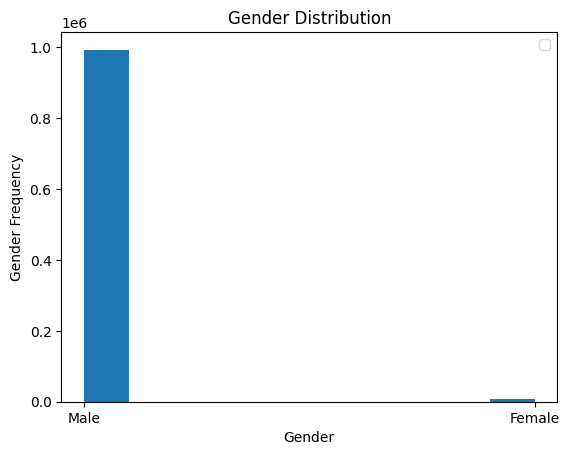

In [96]:
plt.hist(df['Gender'])
plt.xlabel("Gender")
plt.ylabel('Gender Frequency')
plt.title('Gender Distribution')
plt.legend()
plt.show()

In [118]:
df['Bank'] = df['Bank'].fillna(df['Bank'].mode()[0])

In [119]:
df['Bank'].unique()

array(['First National Bank', 'Standard Bank', 'ABSA Bank',
       'Capitec Bank', 'Nedbank', 'FirstRand Bank', 'Investec Bank',
       'Ithala Bank', 'Old Mutual', 'Mercantile Lisbon Bank',
       'RMB Private Bank'], dtype=object)

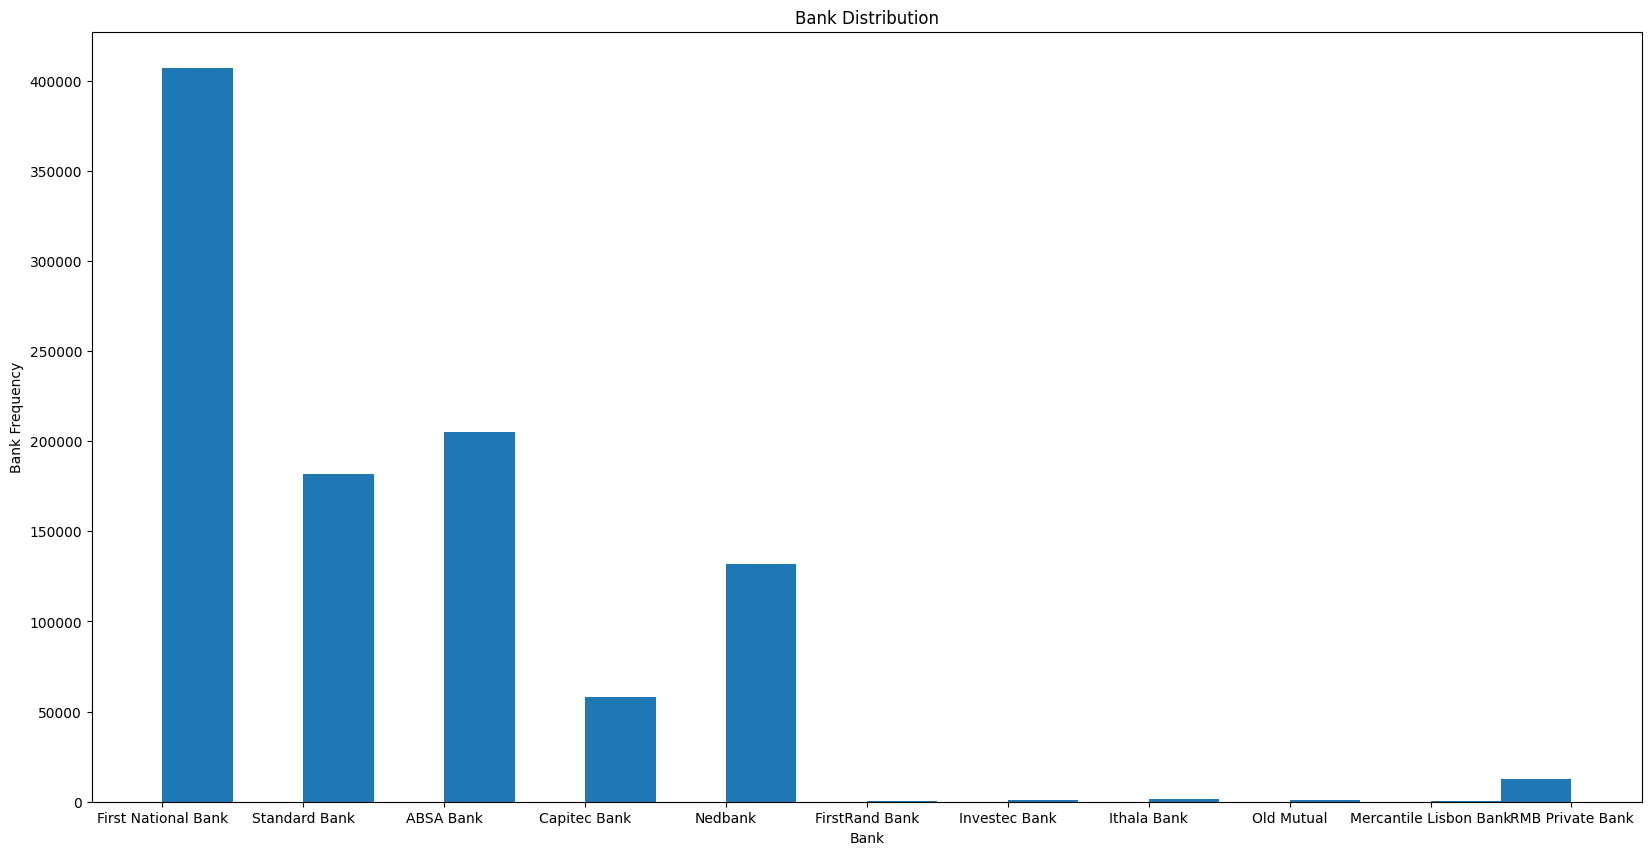

In [131]:
plt.figure(figsize=(20, 10))
plt.hist(df['Bank'], bins=20)
plt.xlabel("Bank")
plt.ylabel('Bank Frequency')
plt.title('Bank Distribution')
plt.show()


In [132]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [138]:
length = len(df['PostalCode'].unique())

In [135]:
df['PostalCode'].unique()

array([1459, 1513, 1619, 1625, 1629, 1852, 1982, 2007, 2066, 4093, 2000,
       1577, 1610, 2410, 6200,  122, 1520, 1709, 1739, 4000, 4066, 4091,
       4342, 4359, 7784,  970, 6213, 6390, 1868, 4310,  299,  309,  152,
        181, 1821, 4449, 4037,  139, 4074, 1057, 7100, 9725, 1863, 1875,
       2001, 2091, 3170, 3950, 1021, 2380,  300,  302,  458, 7750,  157,
       4811, 4930, 5000, 5090, 5160, 5219, 5410, 5920, 6025, 6139, 5040,
       6201, 6212, 6231, 9744,    1,    8,   64,   84,  162,  164, 8000,
        182,  183,  186,  190, 5326,  192,  194,  199,  200,  201,  208,
        258,  264, 1431, 1441, 1455, 1494, 1496,  284, 9762, 1507, 1540,
       1559, 1571, 1724, 1754, 1757, 1759, 1779, 1803, 1804, 1806, 1809,
       1818, 1828, 1830, 1862, 1864, 1865, 1984, 2014, 2019, 2021, 2040,
       2090, 2188, 2198, 3180, 3200, 3245, 3310, 3380, 3609, 3610, 3612,
       3613, 3370, 3600, 3629, 3630, 3650, 3780, 3900, 3934, 3973, 5143,
       3880, 3882, 3915, 4001, 4004, 4011, 4023, 40

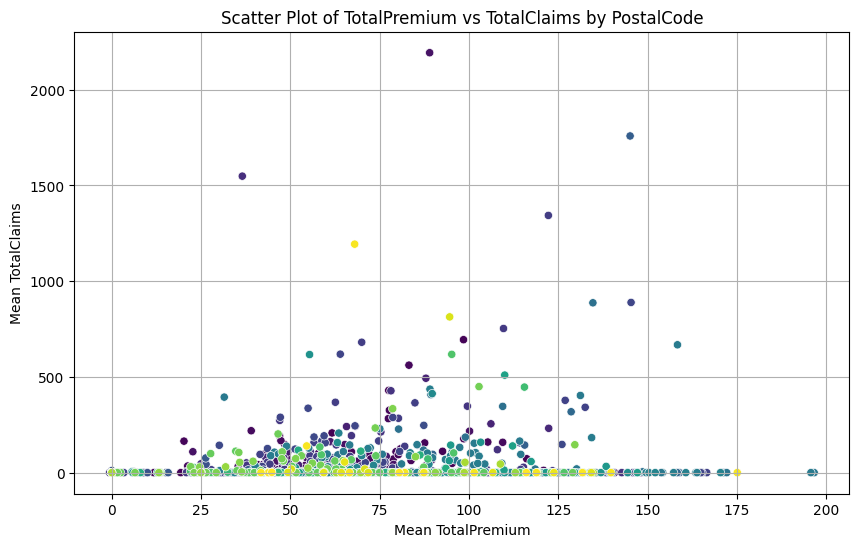

In [145]:
grouped_df = df.groupby('PostalCode').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', legend=None)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by PostalCode')
plt.xlabel('Mean TotalPremium')
plt.ylabel('Mean TotalClaims')
plt.grid()
plt.show()


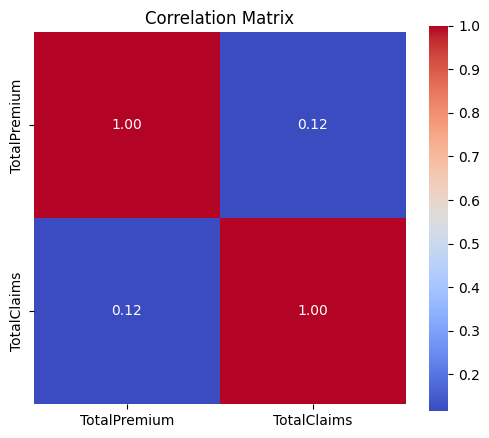

In [146]:
# Calculate correlation matrix
correlation_matrix = grouped_df[['TotalPremium', 'TotalClaims']].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


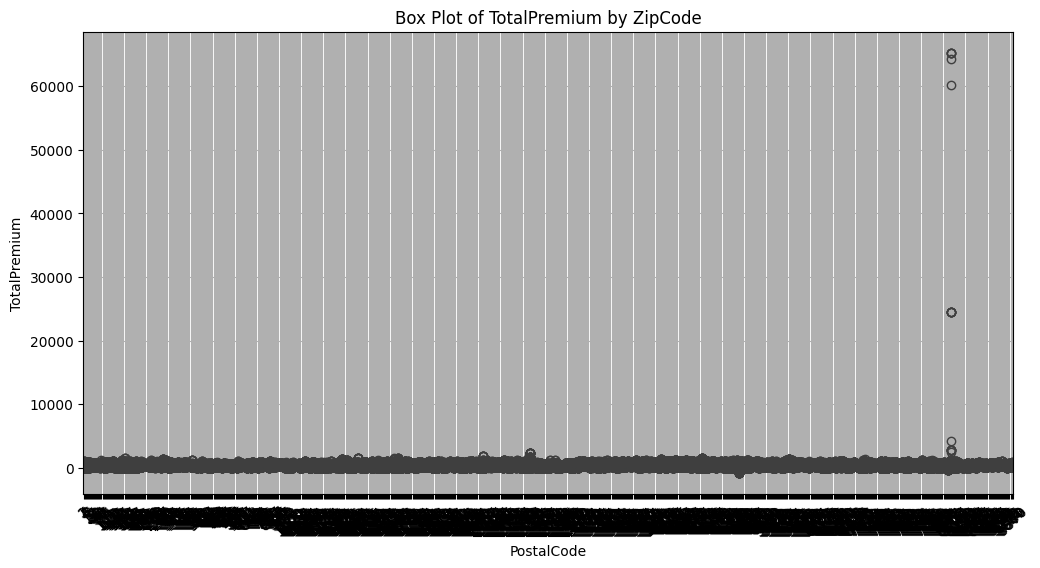

In [149]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PostalCode', y='TotalPremium')
plt.title('Box Plot of TotalPremium by ZipCode')
plt.xlabel('PostalCode')
plt.ylabel('TotalPremium')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid()
plt.show()


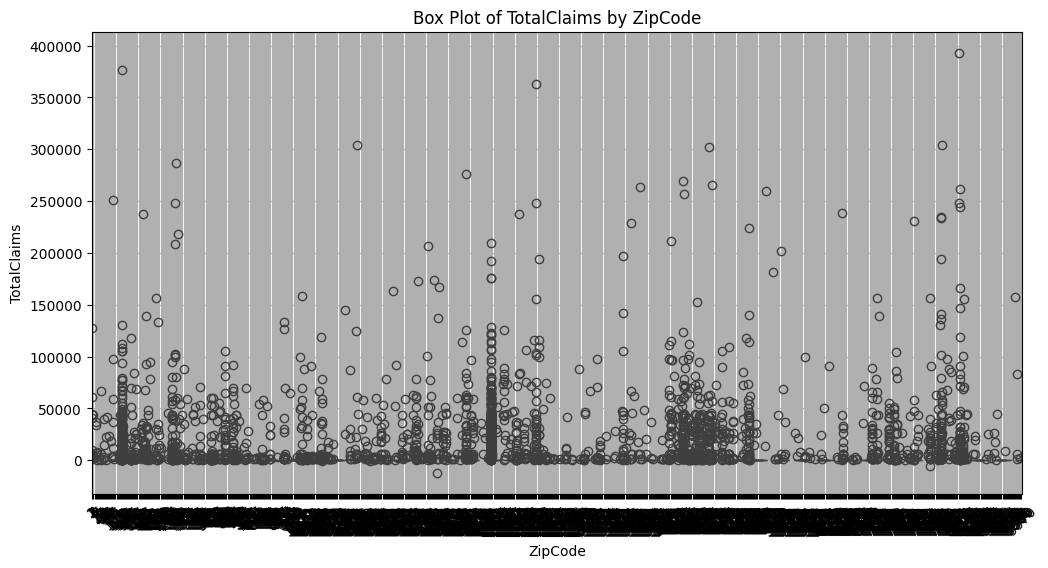

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PostalCode', y='TotalClaims')
plt.title('Box Plot of TotalClaims by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('TotalClaims')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid()
plt.show()


In [ ]:
group_by_greography = df.groupby(['Cou'])

In [159]:
pd1 = df.copy()

In [165]:
df.dropna()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims


In [166]:
df.head(1)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Male,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [155]:
df['CoverType']

0                   Windscreen
1                   Windscreen
2                   Windscreen
3                   Own Damage
4                   Own Damage
                  ...         
1000093            Third Party
1000094            Third Party
1000095            Third Party
1000096    Passenger Liability
1000097    Passenger Liability
Name: CoverType, Length: 1000098, dtype: object